## Lecture 9

### standard score (z-score)
* z = (x – μ) / σ
* z-score is unit-less, can be + or -
* z-score is a numerical measurement that describes a value's relationship to the mean of a group of values
* when distribution is approx. normal, z-score can be conveniently mapped to probabilities
* z-score is measured in terms of standard deviations from the mean
* if a Z-score is 0, it indicates that the data point's score is identical to the mean score.

### correlation
* measures the (linear) relationship between two variables, X = [x1, x2, …Xn], and Y = [y1, y2, …, yn]
    * E.g. between one’s height and weight
* Between results of two tests
    * Problem: the two variables may be on different unit, different scale, or different distribution
* Option 1: convert the measurement to standardized score (z-score)
    * Pearson Correlation Coefficient
* Option 2: sort the values and convert the measurement to ranks
    * Spearman Rank Correlation Coefficient

### pearson correlation coefficient
* a single number that measures both the strength and direction of the linear relationship between two continuous variables
* it has a value between -1 to 1, with a value of -1 meaning a total negative linear correlation, 0 being no correlation, and + 1 meaning a total positive correlation

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTmg0dRoJ1DiowlpdYiJy3G3SoMtC1wrFPhMw&usqp=CAU)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

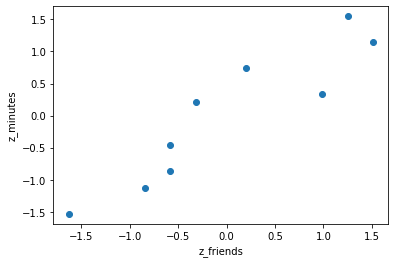

In [3]:
friends = np.array([ 70, 65, 72, 63, 71, 64, 60, 64, 67])
minutes = np.array([175, 170, 205, 120, 220, 130, 105, 145, 190])

#to calculate z-score
def zscore(numArray):
    return(numArray-np.mean(numArray))/np.std(numArray)
zfriends=zscore(friends)
zminutes=zscore(minutes)

plt.scatter(zfriends,zminutes)#using the range/scale of z-score, normalized
plt.xlabel('z_friends')
plt.ylabel('z_minutes')
plt.show()

In [4]:
#to calculate pearson correlation coefficient

#z-score of Xi multiplied by the z-score of Yi
zfriends.dot(zminutes)/len(friends)
#using np.corrcoef gives the same result as the dot product
np.corrcoef(friends,minutes)[0,1]

0.9224638302166008

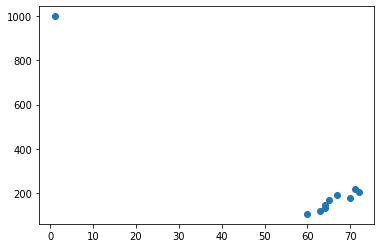

In [5]:
#Pearson correlation coefficient is sensitive to outliers
friends2=np.append(friends,1) #adding point to friends array
minutes2=np.append(minutes,1000) #adding point to minutes array
np.corrcoef(friends2, minutes2)[0,1] #[0,1] only returns the value in the 0,1 spot within the matrix

#what happens to original plot when you add outliers
plt.scatter(friends2,minutes2)
plt.show() #the same distribution of points will show on a z-score plot, but with different scale

In [6]:
def zscore(numArray):
    return(numArray-np.mean(numArray))/np.std(numArray)
zfriends2=zscore(friends2)
zminutes2=zscore(minutes2)
zfriends2.dot(zminutes2)/len(friends2)

-0.9501494679023874

### Spearman Rank Correlation Coefficient 
* a technique which can be used to summarise the strength and direction (negative or positive) of a relationship between two variables
* result will always be between 1 and -1
    * a value of +1 means a perfect association of rank
    * a value of 0 means that there is no association between ranks
    * a value of -1 means a perfect negative association of rank
* di = difference between the two ranks of each observation
* n = number of observations

![](https://www.simplilearn.com/ice9/free_resources_article_thumb/Spearman%E2%80%99s_Rank_Correlation_2.png)


0.9666666666666667
0.43030303030303024


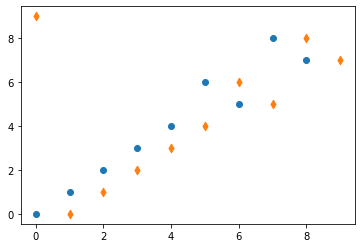

In [7]:
#to compute Spearman’s correlation, we have to compute the rank of each value, which is its index in the sorted sample
#then we compute Pearson’s correlation for the ranks

#argsort->perform an indirect sort along the given axis using the algorithm specified by the "kind" keyword
#returns an array of indices of the same shape as the given array to sort that index data in sorted order.
friends_rank = np.argsort(np.argsort(friends))
#np.argsort(friends) returns an array of the indexes of the elements in friends in sorted order from least to greatest
#np.argsort(np.argsort(friends)) returns an array of of the elements in np.argsort(friends) in sorted order from least to greatest
minutes_rank = np.argsort(np.argsort(minutes))

print(np.corrcoef(friends_rank, minutes_rank)[0,1]) #Return Pearson product-moment correlation coefficients
plt.scatter(friends_rank,minutes_rank)

#testing dataset with outliers, dataset points marked with diamonds
friends_rank2 = np.argsort(np.argsort(friends2))
minutes_rank2 = np.argsort(np.argsort(minutes2))
print(np.corrcoef(friends_rank2, minutes_rank2)[0,1]) #Return Pearson product-moment correlation coefficients
plt.scatter(friends_rank2,minutes_rank2,marker="d")
plt.show()

### correlation
* correlation only measures linear relationship
* correlation does not imply causation
* In general, correlation between two variables does not tell you
whether one causes the other, or the other way around or whether
they might both be caused by something else altogether. 
* Ways to help figure out: time, randomized controlled trial, etc. 

![](https://greenteapress.com/thinkstats/html/thinkstats018.png)
![](https://greenteapress.com/thinkstats/html/thinkstats023.png)

### probability mass function
* a function over the sample space of a discrete random variable X which gives the probability that X is equal to a certain value
* f(x)=P[X=x]
* PMFs work well if the number of values is small. But as the number of
values increases, the probability associated with each value gets smaller and
the effect of random noise increases
* PMF of birth weights. This figure shows a limitation of PMFs:
they are hard to compare.
* Binning can be useful, but it is tricky to get the size of the bins
right. If they are big enough to smooth out noise, they might also smooth
out useful information.

![](https://miro.medium.com/max/864/1*XlERORSJusILdPXUdKel5w.png)
![](https://greenteapress.com/thinkstats/html/thinkstats004.png)

### Cumulative distribution functions
* An alternative that avoids the problems of PMF is the cumulative distribution
function
* The CDF is the function that maps values to their percentile rank in a distribution
* CDF is a function of x, where x is any value that might appear in the
distribution. To evaluate CDF(x) for a particular value of x, we compute the fraction of the values in the sample less than (or equal to) x
* If x is less than the smallest value in the sample, CDF(x) is 0. If x is greater than the largest value, CDF(x) is 1
* Cdfs are implemented with two sorted lists: xs, which contains the values, and ps, which contains the probabilities. The most important methods Cdfs provide are:
    * Prob(x): Given a value x, computes the probability p = CDF(x).
    * Value(p): Given a probability p, computes the corresponding value, x; that is, the inverse CDF of p
    
![](https://miro.medium.com/max/750/1*2vXxablEGsq5Y9Cy7Ifmng.png)
![](https://greenteapress.com/thinkstats/html/book006.png)

### PMF vs CDF
* plot(bin_center20, counts20[0]/sum(counts20[0]), 'r-x',
bin_center10, counts10[0]/sum(counts10[0]), 'b-+')

* plot(sort(a), arange(len(a))/len(a))

### Probability Density Function (PDF) and continuous distribution
* For continuous distribution, no PMF
* Instead, probability density function (PDF) is available
* PDF is the derivative of CD
* probability density measures probability per unit of x. In order to
get a probability mass2, you have to integrate over x. 
    * For example, if x is a random variable whose PDF is PDFX, we can compute the probability that a value from X falls between a and b:
            ![](https://sites.nicholas.duke.edu/statsreview/files/2013/06/pdf.jpg)


### standard normal pdf
* scipy.stats.norm
    * norm.pdf(x,loc,scale)
    * norm.cdf(x,loc,scale)
        * The location (loc) keyword specifies the mean. The scale (scale) keyword specifies the standard deviation.they're not necessary
            * loc shifts the graph left and right according to mean, scale increases/decreases width of graph according to std deviation


Text(0.5, 1.0, 'Standard Normal Distribution')

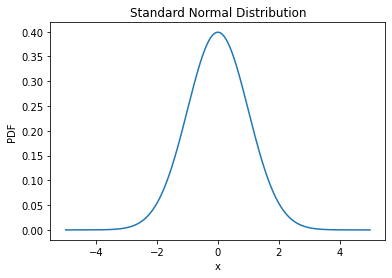

In [8]:
from scipy.stats import norm

x=np.linspace(-5,5,10**3)
y=norm.pdf(x,0,1)
#(x, loc=0,scale=1)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Standard Normal Distribution')

In [9]:
#in a standard normal distribution, what is the probability to get 0
norm.pdf(0,0,1)

0.3989422804014327

Text(0.5, 1.0, 'Standard Normal Distribution')

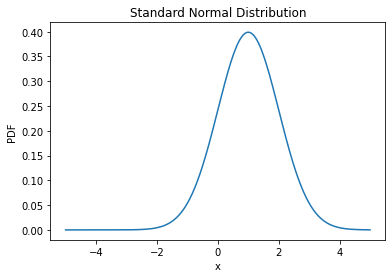

In [10]:
#we have changed the mean to 1
y=norm.pdf(x,1,1)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Standard Normal Distribution')